##### Sales Data Analysis

In [17]:
import pandas as pd
import os

In [13]:
#### merge the data

In [ ]:
df = pd.read_csv(r"C:\Users\User\Desktop\Sales\Sales_January_2019.csv")


In [36]:
df = pd.read_csv(r"C:\Users\User\Desktop\Sales\Sales_January_2019.csv")

files = [file for file in os.listdir(r"C:\Users\User\Desktop\Sales")]
for file in files:
    print(file)

.ipynb_checkpoints
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [38]:
# Directory containing the CSV files
directory = r"C:\Users\User\Desktop\Sales"

# List to store DataFrames
dfs = []

# Loop through the files in the directory
for file in os.listdir(directory):
    if file.endswith(".csv"):
        file_path = os.path.join(directory, file)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames in the list
concatenated_df = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the concatenated DataFrame
print(concatenated_df.head())


  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


In [44]:
# check for missing values 
print (df.isnull())
# summary Statistics
print(df.describe())


       Order ID  Product  Quantity Ordered  Price Each  Order Date  \
0         False    False             False       False       False   
1         False    False             False       False       False   
2         False    False             False       False       False   
3         False    False             False       False       False   
4         False    False             False       False       False   
...         ...      ...               ...         ...         ...   
11681     False    False             False       False       False   
11682     False    False             False       False       False   
11683     False    False             False       False       False   
11684     False    False             False       False       False   
11685     False    False             False       False       False   

       Purchase Address  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  
...

In [66]:
# List all CSV files in the specified directory
directory_path = r'C:\Users\User\Desktop\Sales'
files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame
all_months_data = pd.DataFrame()

# Loop through each file and concatenate the data
for file in files:
    file_path = os.path.join(directory_path, file)
    df = pd.read_csv(file_path)
    all_months_data = pd.concat([all_months_data, df])

# Remove rows with any NaN values
all_months_data_cleaned = all_months_data.dropna()

# Save the cleaned data to a new CSV file
all_months_data_cleaned.to_csv(r"C:\Users\User\Desktop\all_data_cleaned.csv", index=False)


In [70]:
all_data = pd.read_csv(r"C:\Users\User\Desktop\all_data_cleaned.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [88]:
# List all CSV files in the specified directory
directory_path = r'C:\Users\User\Desktop\Sales'
files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame
all_months_data = pd.DataFrame()

# Loop through each file and concatenate the data
for i, file in enumerate(files):
    file_path = os.path.join(directory_path, file)
    if i == 0:
        # Read the first file with headers
        df = pd.read_csv(file_path)
        print(f"Columns in the first file: {df.columns.tolist()}")
    else:
        # Read subsequent files with headers
        df = pd.read_csv(file_path)
        print(f"Columns in file {file}: {df.columns.tolist()}")
    
    # Ensure the column names are consistent
    if 'Quantity Ordered' not in df.columns:
        print(f"Warning: 'Quantity Ordered' column not found in file {file}")
        continue
    
    # Concatenate the data
    all_months_data = pd.concat([all_months_data, df], ignore_index=True)

# Print columns of the concatenated DataFrame
print(f"Columns in concatenated DataFrame: {all_months_data.columns.tolist()}")

# Convert the "Quantity Ordered" column to numeric, forcing errors to NaN
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'], errors='coerce')

# Drop rows where "Quantity Ordered" column has NaN values
all_months_data_cleaned = all_months_data.dropna(subset=['Quantity Ordered'])

# Remove any remaining rows with NaN values in other columns
all_months_data_cleaned = all_months_data_cleaned.dropna()

# Save the cleaned data to a new CSV file
output_file_path = r"C:\Users\User\Desktop\all_data_cleaned_v3.csv"
all_months_data_cleaned.to_csv(output_file_path, index=False)


Columns in the first file: ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
Columns in file Sales_August_2019.csv: ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
Columns in file Sales_December_2019.csv: ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
Columns in file Sales_February_2019.csv: ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
Columns in file Sales_January_2019.csv: ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
Columns in file Sales_July_2019.csv: ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
Columns in file Sales_June_2019.csv: ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
Columns in file Sales_March_2019.csv: ['Order ID', 'Product', 'Quantity Ordered', 'Price Each'

In [184]:
all_data['city'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

In [186]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",Boston
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles
...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",Los Angeles
185946,259354,iPhone,1,700.00,09-01-2019 16:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco
185947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",San Francisco
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",San Francisco


In [ ]:
#### Number of Order by city

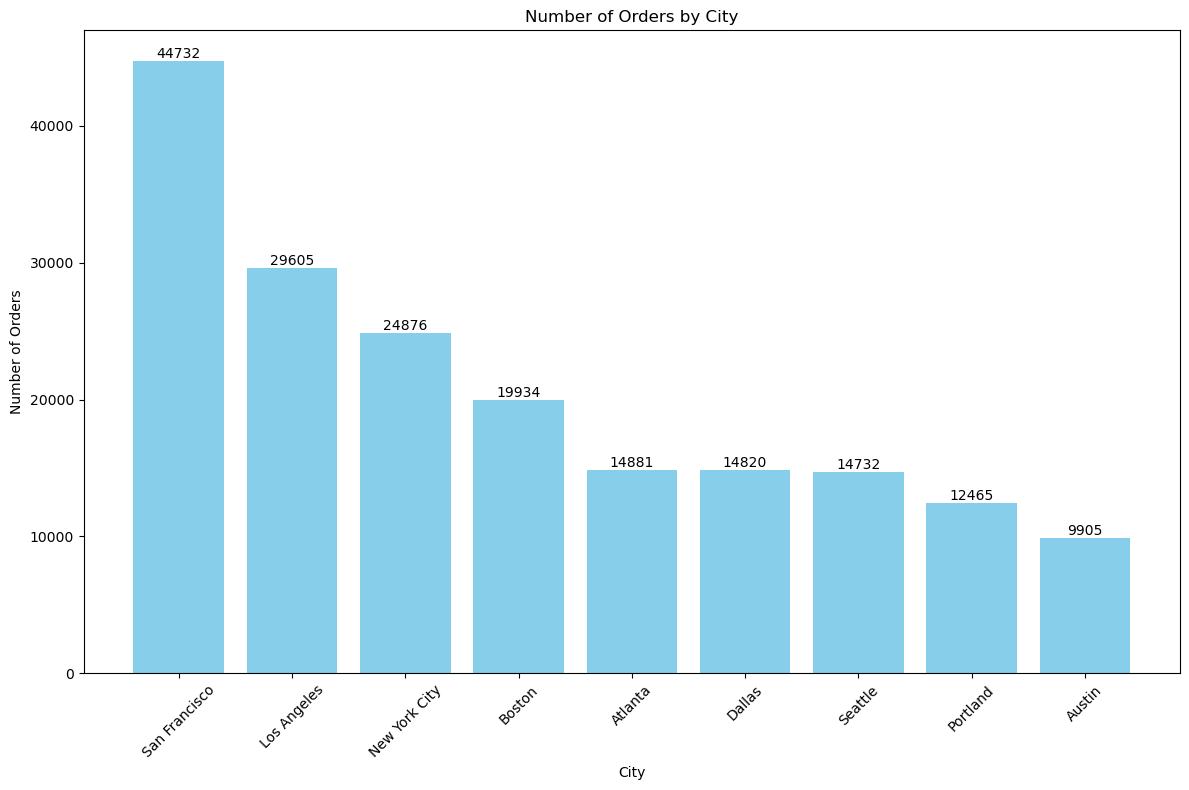

In [218]:
import matplotlib.pyplot as plt

# Count the number of orders per city
city_counts = all_data['city'].value_counts().reset_index()
city_counts.columns = ['City', 'Number of Orders']

# Sort the data by number of orders
city_counts = city_counts.sort_values(by='Number of Orders', ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(city_counts['City'], city_counts['Number of Orders'], color='skyblue')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), ha='center', va='bottom')

plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


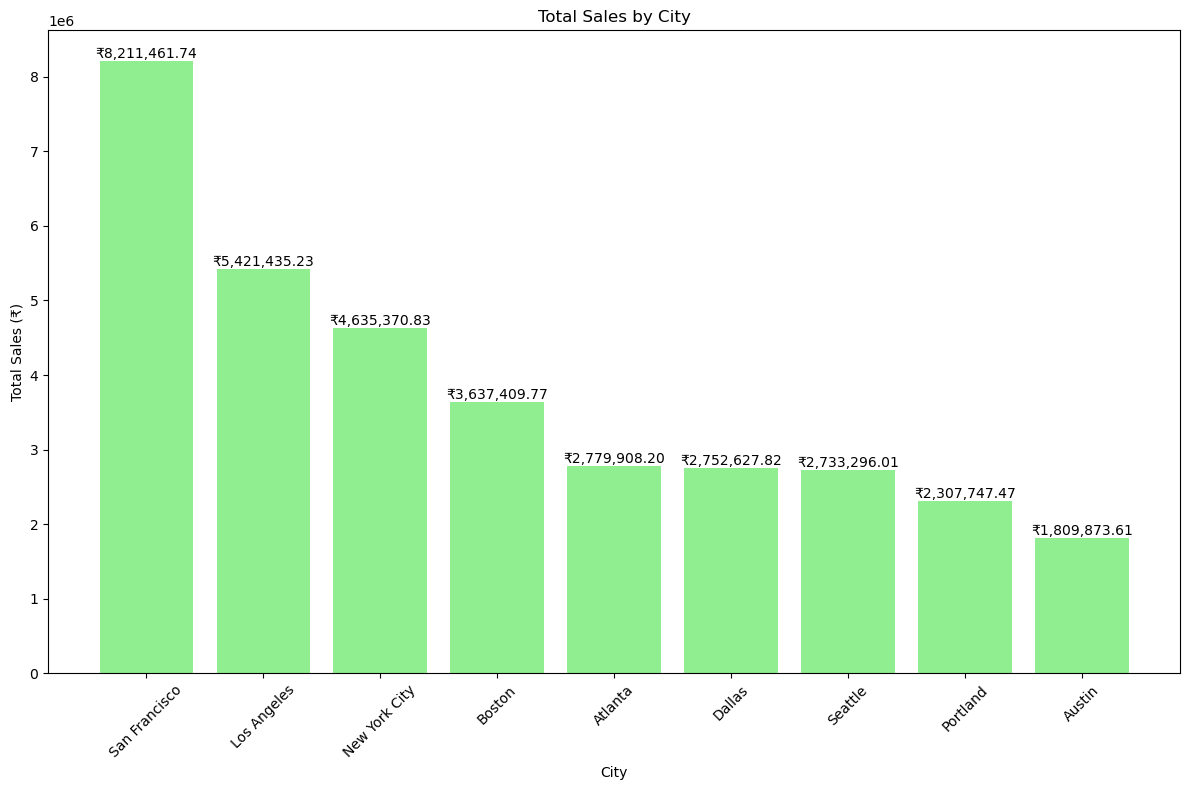

In [220]:
# Calculate total sales per city
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')
sales_by_city = all_data.groupby('city')['Price Each'].sum().reset_index()
sales_by_city.columns = ['City', 'Total Sales']

# Sort by total sales for better visualization
sales_by_city = sales_by_city.sort_values(by='Total Sales', ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(sales_by_city['City'], sales_by_city['Total Sales'], color='lightgreen')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'₹{yval:,.2f}', ha='center', va='bottom')

plt.xlabel('City')
plt.ylabel('Total Sales (₹)')
plt.title('Total Sales by City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [194]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",Boston
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles
...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",Los Angeles
185946,259354,iPhone,1,700.00,09-01-2019 16:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco
185947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",San Francisco
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",San Francisco


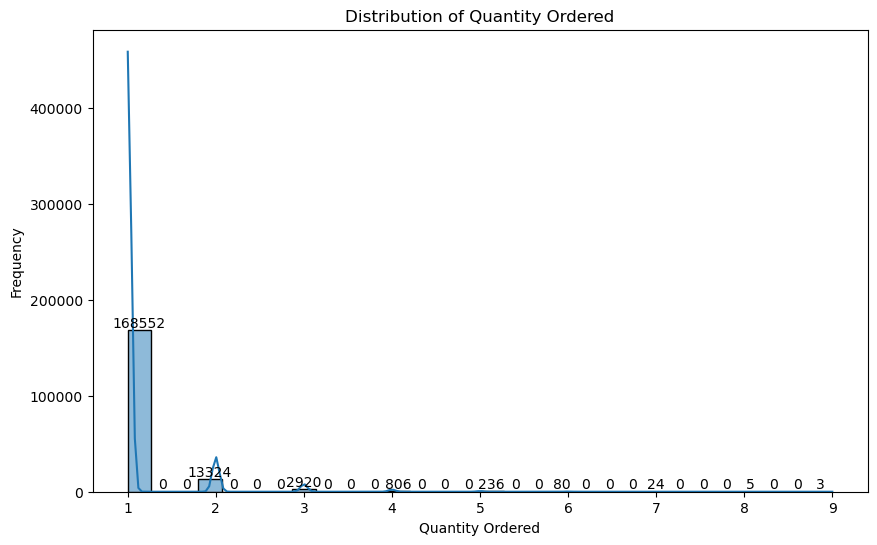

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(all_data['Quantity Ordered'], bins=30, kde=True)

# Adding data labels
counts, bins, patches = plt.hist(all_data['Quantity Ordered'].dropna(), bins=30, alpha=0)

# Adding text labels
for count, patch in zip(counts, patches):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2., height, int(height), ha='center', va='bottom')

plt.title('Distribution of Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()


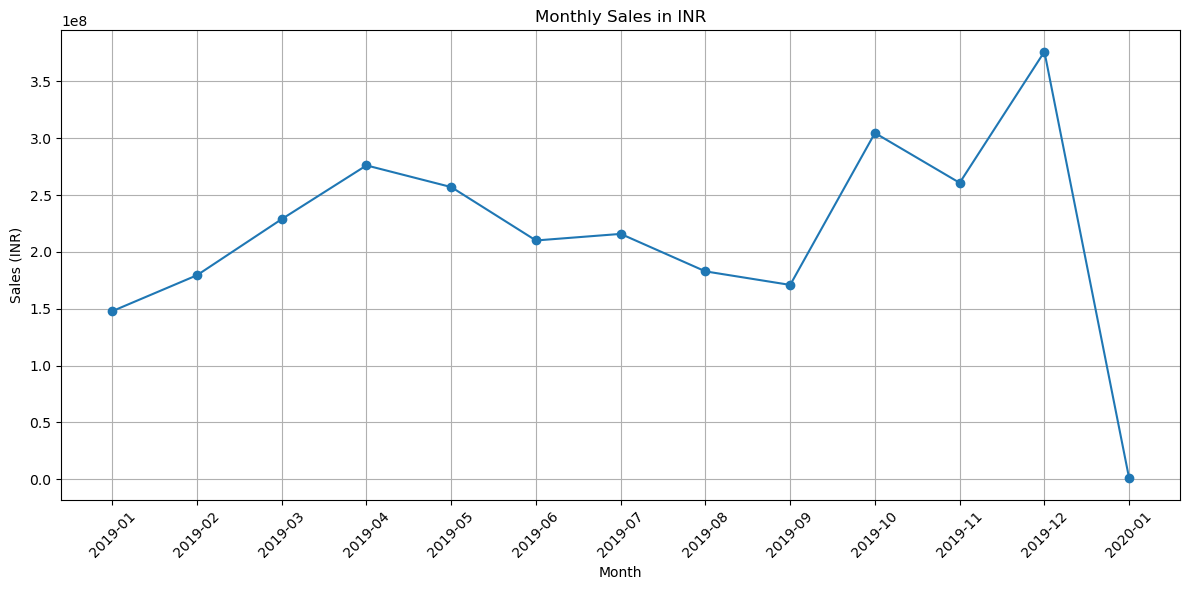

In [224]:
 # Convert 'Order Date' to datetime format
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')

# Extract month and year from 'Order Date'
all_data['YearMonth'] = all_data['Order Date'].dt.to_period('M')

# Calculate total sales by month in USD
monthly_sales_usd = all_data.groupby('YearMonth')['Price Each'].sum().reset_index()

# Convert sales amount to INR
exchange_rate = 82  # 1 USD to INR rate
monthly_sales_usd['Price Each'] *= exchange_rate

# Rename column for clarity
monthly_sales_usd.rename(columns={'Price Each': 'Sales (INR)'}, inplace=True)

# Plotting the sales by month
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_usd['YearMonth'].astype(str), monthly_sales_usd['Sales (INR)'], marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales in INR')
plt.xlabel('Month')
plt.ylabel('Sales (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()


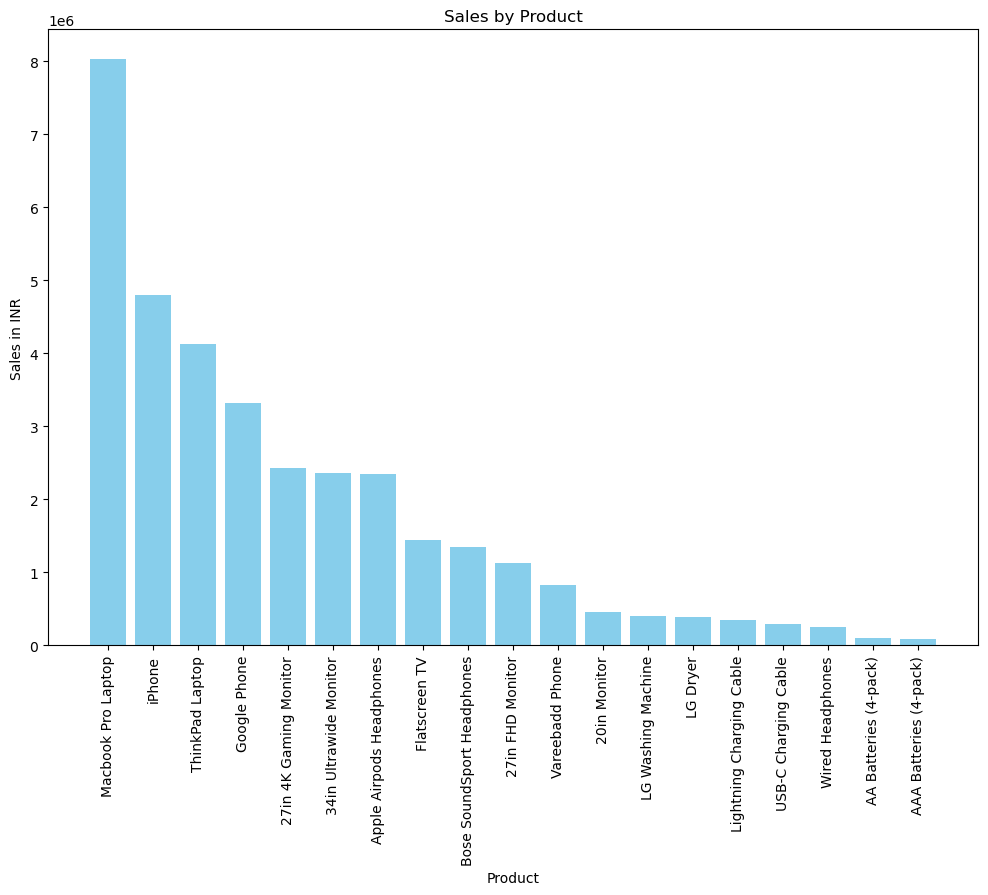

In [210]:
# Ensure 'Quantity Ordered' and 'Price Each' are numeric
all_data_cleaned['Quantity Ordered'] = pd.to_numeric(all_data_cleaned['Quantity Ordered'], errors='coerce')
all_data_cleaned['Price Each'] = pd.to_numeric(all_data_cleaned['Price Each'], errors='coerce')

# Calculate the total sales for each product
all_data_cleaned['Sales'] = all_data_cleaned['Quantity Ordered'] * all_data_cleaned['Price Each']

# Group by 'Product' and sum the sales
sales_by_product = all_data_cleaned.groupby('Product')['Sales'].sum().reset_index()

# Sort the sales data for better visualization
sales_by_product = sales_by_product.sort_values(by='Sales', ascending=False)

# Visualize the sales by product
plt.figure(figsize=(12, 8))
plt.bar(sales_by_product['Product'], sales_by_product['Sales'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Sales in INR')
plt.title('Sales by Product')
plt.xticks(rotation=90)
plt.show()


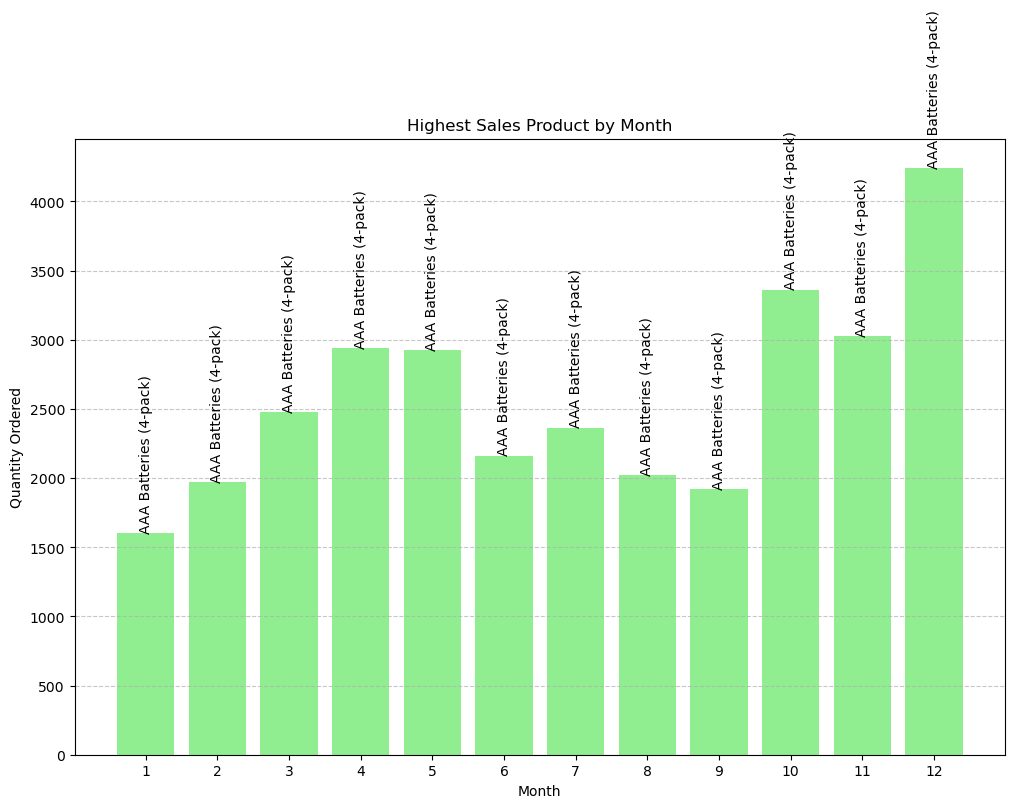

In [214]:
# Ensure 'Order Date' is in datetime format
all_data_cleaned['Order Date'] = pd.to_datetime(all_data_cleaned['Order Date'], errors='coerce')

# Extract month from 'Order Date'
all_data_cleaned['Month'] = all_data_cleaned['Order Date'].dt.month

# Group by 'Month' and 'Product', then sum 'Quantity Ordered'
monthly_product_sales = all_data_cleaned.groupby(['Month', 'Product'])['Quantity Ordered'].sum().reset_index()

# Identify the highest ordered product for each month
highest_ordered_product_per_month = monthly_product_sales.loc[monthly_product_sales.groupby('Month')['Quantity Ordered'].idxmax()]

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(highest_ordered_product_per_month['Month'], highest_ordered_product_per_month['Quantity Ordered'], color='lightgreen')

# Adding product names as labels on top of the bars
for i in range(len(highest_ordered_product_per_month)):
    plt.text(highest_ordered_product_per_month['Month'].iloc[i], highest_ordered_product_per_month['Quantity Ordered'].iloc[i], 
             highest_ordered_product_per_month['Product'].iloc[i], ha='center', va='bottom', rotation=90)

plt.title('Highest Sales Product by Month')
plt.xlabel('Month')
plt.ylabel('Quantity Ordered')
plt.xticks(highest_ordered_product_per_month['Month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
